# Forecasting

In [1]:
%load_ext autoreload
%autoreload 2

import pysm3
from fgbuster import get_instrument, get_sky, get_observation
import healpy as hp
import numpy as np
from fgbuster import xForecast, CMB, Dust, Synchrotron

nside = 64
# define sky and foregrounds simulations
sky = get_sky(nside, 'd0s0')
# define instrument
instrument = get_instrument('SO_SAT')
# get noiseless frequency maps
freq_maps = get_observation(instrument, sky)
# take only the Q and U maps
freq_maps = freq_maps[:,1:]

In [2]:
# create 3% circular sky mask
RA = 2*np.pi-70.*np.pi/180
DEC = np.pi/2+70.*np.pi/180
radius = 34*np.pi/180
mask_circular = np.zeros(12*nside**2)
for ipix in range(12*nside**2):
    theta, phi = hp.pix2ang(nside, ipix)
    if (((phi - RA)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
    if (((phi - RA+2*np.pi)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
# applying mask to observed frequency maps
freq_maps[...,mask_circular==0] = 0.0

In [3]:
# define components used in the modeling
components = [CMB(), Dust(150.), Synchrotron(150.)]

fsky =  0.030192057291666668
======= ESTIMATION OF SPECTRAL PARAMETERS =======


/home/wassim/Projects/CMB/fgbuster/fgbuster/algebra.py:989: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)


res.x =  [ 1.53999995 20.         -2.99999998]
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======
======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======
bounds on r =  0.0009862521794868784  /  0.0010328281259410286
starting point =  0.0010092715146305707
    ===>> fitted r =  [0.001]
======= ESTIMATION OF SIGMA(R) =======
case # 3
bounds on sigma(r) =  [0.00234622]  /  [0.00240093]
starting point =  [0.00237342]
    ===>> sigma(r) =  [0.00138527]
======= GRIDDING COSMO LIKELIHOOD =======


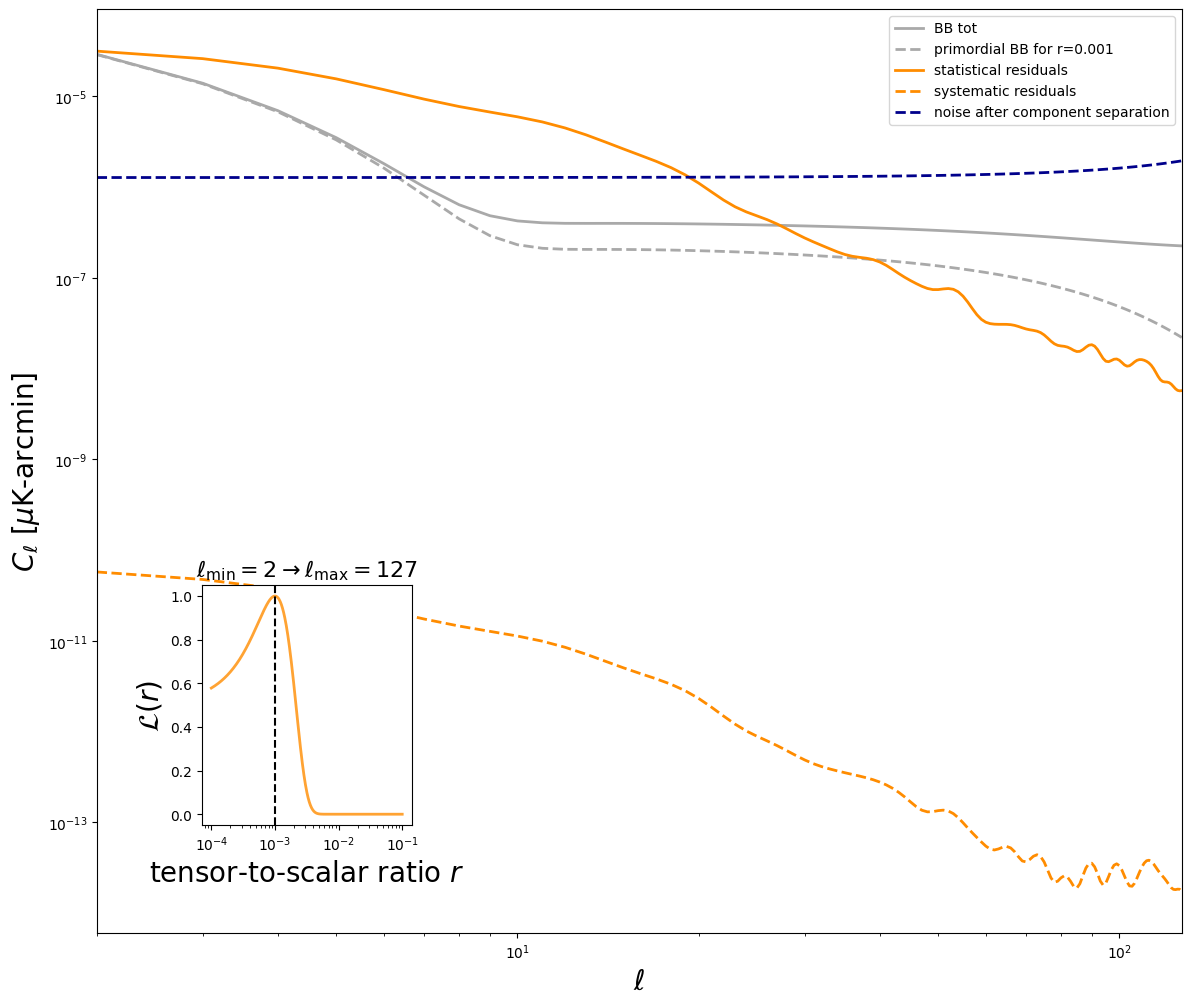

In [4]:
# call for xForecast
# with lmin=2, lmax=2*nside-1, and Alens=0.1
# you can try with make_figure=True if you want to output angular power spectra and profile likelihood on r
res = xForecast(components, instrument, freq_maps, 2, 2*nside-1, Alens=0.1, r=0.001, make_figure=True)